In [1]:
from datasets import load_from_disk

datasets = load_from_disk('../data/train_dataset')
type(datasets)

datasets.dataset_dict.DatasetDict

## datasets의 형태

In [2]:
datasets

DatasetDict({
    train: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 240
    })
})

## train 데이터의 형태

In [3]:
datasets = datasets['train']
datasets

Dataset({
    features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
    num_rows: 3952
})

In [4]:
title = datasets['title']
context = datasets['context']
question = datasets['question']
id = datasets['id']
answers = datasets['answers']
document_id = datasets['document_id']

## answers의 길이 비교

In [5]:
min_len = 1e9
max_len = 0
data = []
for list_ in answers:
    max_len = max(max_len, len(list_['text'][0]))
    min_len = min(min_len, len(list_['text'][0]))
    data.append(len(list_['text'][0]))

min_len, max_len

(1, 83)

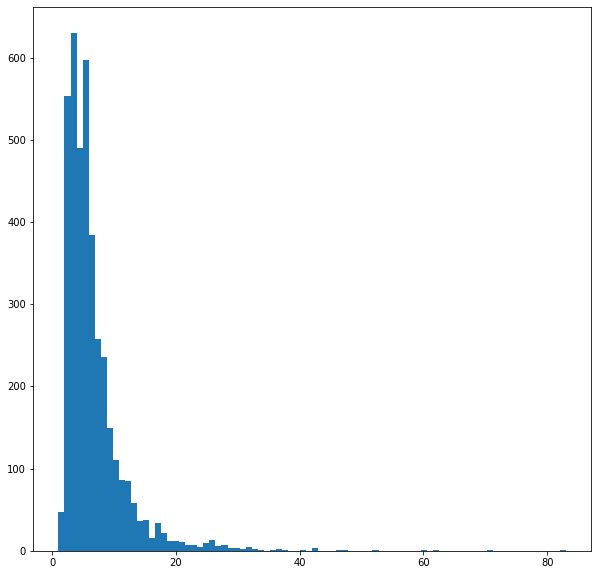

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.hist(data, bins=84)
plt.show()

In [21]:
for list_ in answers:
    if len(list_['text'][0]) > 80:
        print(list_['text'][0])

“나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통치하에 있는 한 우리는 그 통치의 명령에 복종해야 하기 때문이다.”


## Context의 길이 비교

In [7]:
context[0]

'미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05'

In [8]:
min_len = 1e9
max_len = 0
data = []
for con in context:
    max_len = max(max_len, len(con))
    min_len = min(min_len, len(con))
    data.append(len(con))

min_len, max_len

(512, 2059)

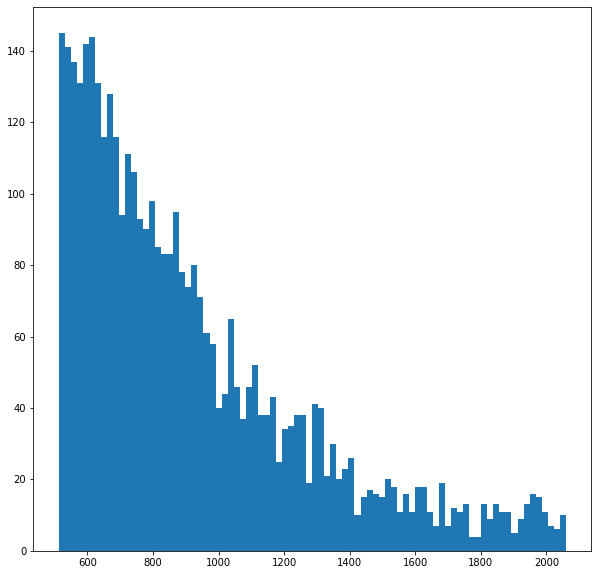

In [9]:
fig = plt.figure(figsize=(10,10))
plt.hist(data, bins=84)
plt.show()

In [10]:
for con in context:
    if len(con) == 2059:
        print(con)

그는 전라남도 고흥군에 태어나 조선대학교 생물학과를 졸업하고 순천고등학교와 광주고등학교에서 생물 교사로 부임하여 생물을 가르쳤다. 부인 서복영(전 한려대학교 총장) 역시 고등학교에서 가정을 가르치던 평범한 교사였다. 이들 부부는 광주광역시에서 목욕탕을 운영해 돈을 모았고, 1977년 부동산에 투자해 모은 5천만원으로 자신들의 이름 가운데 글자를 따서 ‘홍복학원’을 설립했다. 이씨부부는 79년옥천여자상업고등학교를 시작으로, 1991년에 서남대학교, 1993년에 광주예술대학교, 1995년에 한려산업대학교(현재의 한려대학교) 등 3개 고등학교와 5대 대학교 등 총 8개의 학교를 설립했으나 모두 부실대학, 부실학원으로 판정을 받았다. 또한 남광병원과 녹십자병원을 인수한 뒤 이 중 녹십자병원을 서남대학교 부속병원으로 만들었다. 다만 설립한 대학교는 모두 부실대학으로 선정되는 등 많은 물의를 일으켰지만 설립한 고등학교 중에서 대광여자고등학교만은 엄청난 명문고교로 광주광역시 최고의 명문여고로 명성이 높았다. 대광여자고등학교는 광주는 물론이고 호남권에서도 대체로 서울대학교, 연세대학교, 고려대학교 등 명문대 합격생을 많이 배출하는 편이다. 이홍하가 대광여자고등학교만큼은 정성을 들인 이유가 자신이 설립한 학교들 중 하나만이라도 제대로 유지되어야 학교법인 홍복학원이 인가취소되는 일을 막을 수 있기 때문이며 대광여자고등학교는 그러한 목적으로 운영되는 학교이기 때문에 학교법인 홍복학원에서 가장 정성을 들이고 있다. \n\n1998년 12월, 교비 409억원을 횡령하고 이를 대학설립 및 인수비용, 자녀 유학비용으로 사용한 혐의로 구속 기소 된바 있으며 1심에서 징역 3년 2월, 2심에서 징역 1년 6월, 집행유예 2년을 선고받은 뒤 불과 2개월만에 사면·복권되었다. 당시 법무부장관이 고흥출신 국회의원인 이홍하의 고향 동창생인 박상천 이었다. 2007년 2월에도 서남대 교비 3억 8천만원을 횡령하여 개인 대출채무를 변제한 혐의로 기소되어 징역 1년 6월, 집행유예 2년 선고받은 바 있

## Question의 길이 비교

In [11]:
question[0]

'대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?'

In [12]:
min_len = 1e9
max_len = 0
data = []
for q in question:
    max_len = max(max_len, len(q))
    min_len = min(min_len, len(q))
    data.append(len(q))

min_len, max_len

(8, 78)

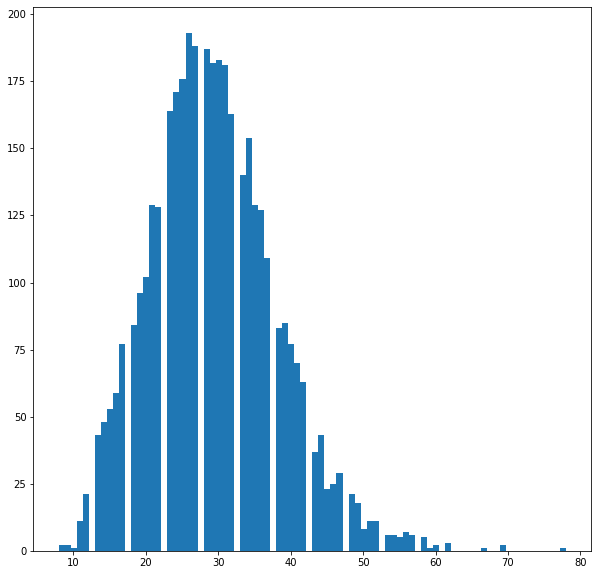

In [13]:
fig = plt.figure(figsize=(10,10))
plt.hist(data, bins=84)
plt.show()

In [14]:
# 가장 긴 질문

for q in question:
    if len(q) > 70:
        print(q)

사전처분에도 불구하고 양육 부모가 비양육 부모에게 아이를 보여주지 않을 때 위반 행위자에게 1천만원 이하의 과태료를 부과할 수 있는 제도는?


In [15]:
# 가장 짧은 질문

for q in question:
    if len(q) < 10:
        print(q)

우메노의 사인은?
연희의 직업은?
훈다손의 뜻은?
삼존불의 재질은?


## 답변의 형태

In [16]:
data_ = []
for answer in answers:
    if answer in data: continue
    data_.append(answer)

data_

[{'answer_start': [235], 'text': ['하원']},
 {'answer_start': [212], 'text': ['《경영의 실제》']},
 {'answer_start': [510], 'text': ['백성']},
 {'answer_start': [625], 'text': ['중국']},
 {'answer_start': [30], 'text': ['4개']},
 {'answer_start': [91], 'text': ['드래곤']},
 {'answer_start': [68], 'text': ['형양태수 왕식']},
 {'answer_start': [583], 'text': ['이탈리아군']},
 {'answer_start': [195], 'text': ['큰아들 유']},
 {'answer_start': [861], 'text': ['왕대마을']},
 {'answer_start': [817], 'text': ['음독자살']},
 {'answer_start': [414], 'text': ['출장 잦은 건축가']},
 {'answer_start': [86], 'text': ['반신화적인 인물인 우파']},
 {'answer_start': [26], 'text': ['1951년']},
 {'answer_start': [497], 'text': ['예수']},
 {'answer_start': [524], 'text': ["'초일기'"]},
 {'answer_start': [414], 'text': ['1916년']},
 {'answer_start': [13], 'text': ['레드삭스']},
 {'answer_start': [228], 'text': ['삼판동']},
 {'answer_start': [585], 'text': ['다산 정약용']},
 {'answer_start': [166], 'text': ['대나라']},
 {'answer_start': [142], 'text': ['10달러']},
 {'answer_start': [59], 

## 지문의 형태

In [17]:
import re

com = re.compile(r'[가-힣a-zA-Z0-9]')

data_ = []
cnt=0
for con in context:
    con = com.sub('',con)
    print(con)

data_

    (  )    .\\   .         .  ,    /     .\\               .     ,                .  ,        .    ,    ,           .     (    ) .            .           ()                    .                .                 .         .=--
' '  ' '     .   , .     ,     , ,     ,          .      《 》    ,        .           ,      .\\       .     ( )   ,      .   ' '     ,       '  '  .    , ,      .
                ,                         .         . \    .           .     .\     《》    \            \\           . ( )  〈〉(告別上諭),        “        ,       .” .  “       ,     ,    ,     ,        ,         .”    .             .
    ,          (佛龕) .       ,          . \\     ,        .             ,        .                .\\  ,         .    (光背)    ,    .       (冠)         .\\            .   ,   ,       (冠)            ∼  .                  .
          ,      . (外函)   ,               .\\         “癸巳二月日 施主承表 兩主”                   .\\                 ,              .\\        ,          ,        ,      

[]

한자, 일본어 -> 대부분을 차지  
한국어 중에서 ㅋㅋㅋㅋㅋ와 같은 자음만 존재하는 경우  

Πάτραι : 헬라어?  
المملوك : 아랍어  
ðóð : 고대영어? or 베트남어?  
क़ुली : 인도어  
Φάλαγγα : 숫자기호  
ὁπλίτης : 고대 그리스어  
④ : 특수문자  
ＭＳ ５, ８ : 문자기호들도 존재하는 듯  
козаки́ : 우크라이나?  

